Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

# Part 2

Code a two-layer fully connected network with H = 200 hidden nodes. Choose the sigmoid function as
the activation function for the hidden nodes. The output layer has no activation function.

(a) Implement gradient descent and run for 300 epochs.

(b) Report the (initial) learning rate, training and testing loss and accuracies.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [3]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [4]:
epochs = 300
batch_size = Ntr
#iterations = round(Ntr/batch_size)
lr = 1.4e-2
lr_decay=0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

In [5]:
#Weight Initialising
std=1e-5
w1 = std*np.random.randn(Din, 200)
b1 = np.zeros(200)

w2 = std*np.random.randn(200, 10)
b2 = np.zeros(10)

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [6]:
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)

  x = x_train[indices]
  y = y_train[indices]

  h = 1./(1.+np.exp(-(x.dot(w1)+b1)))
  y_pred = h.dot(w2)+b2

  loss = 1./(batch_size*2)*np.square(y_pred-y).sum() + reg/(batch_size*2)*(np.sum(w1*w1)+np.sum(w2*w2))
  loss_history.append(loss)

  train_acc = find_accuracy(y_pred, y)
  train_acc_history.append(train_acc)

  h_val = 1./(1.+np.exp(-(x_test.dot(w1)+b1)))
  y_pred_val = h_val.dot(w2)+b2

  val_acc = find_accuracy(y_pred_val, y_test)
  val_acc_history.append(val_acc)

  if t%10==0 or t == epochs:
    print('Epoch %d/%d: Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,loss, train_acc, val_acc))

  dy = 1.0/batch_size*(y_pred-y)

  dw2 = h.T.dot(dy) + 1./batch_size*reg*w2
  w2 -= lr*dw2

  db2 = dy.sum(axis = 0)
  b2 -= lr*db2

  dh = dy.dot(w2.T)

  dw1 = x.T.dot(dh*h*(1-h)) + 1./batch_size*reg*w1
  w1 -= lr*dw1

  db1 = (dh*h*(1-h)).sum(axis =0)
  b1 -= lr*db1
  
  lr *= lr_decay


  

Epoch 10/300: Loss: 0.437718,  Training Accuracy: 16.938000, Validation Accuracy: 16.990000
Epoch 20/300: Loss: 0.425271,  Training Accuracy: 23.396000, Validation Accuracy: 23.240000
Epoch 30/300: Loss: 0.418850,  Training Accuracy: 28.284000, Validation Accuracy: 28.110000
Epoch 40/300: Loss: 0.415960,  Training Accuracy: 29.862000, Validation Accuracy: 30.080000
Epoch 50/300: Loss: 0.412103,  Training Accuracy: 32.352000, Validation Accuracy: 32.350000
Epoch 60/300: Loss: 0.408953,  Training Accuracy: 33.714000, Validation Accuracy: 33.600000
Epoch 70/300: Loss: 0.406274,  Training Accuracy: 34.554000, Validation Accuracy: 34.840000
Epoch 80/300: Loss: 0.403548,  Training Accuracy: 35.750000, Validation Accuracy: 36.030000
Epoch 90/300: Loss: 0.400290,  Training Accuracy: 37.030000, Validation Accuracy: 36.870000
Epoch 100/300: Loss: 0.400493,  Training Accuracy: 36.546000, Validation Accuracy: 36.680000
Epoch 110/300: Loss: 0.396601,  Training Accuracy: 38.146000, Validation Accura

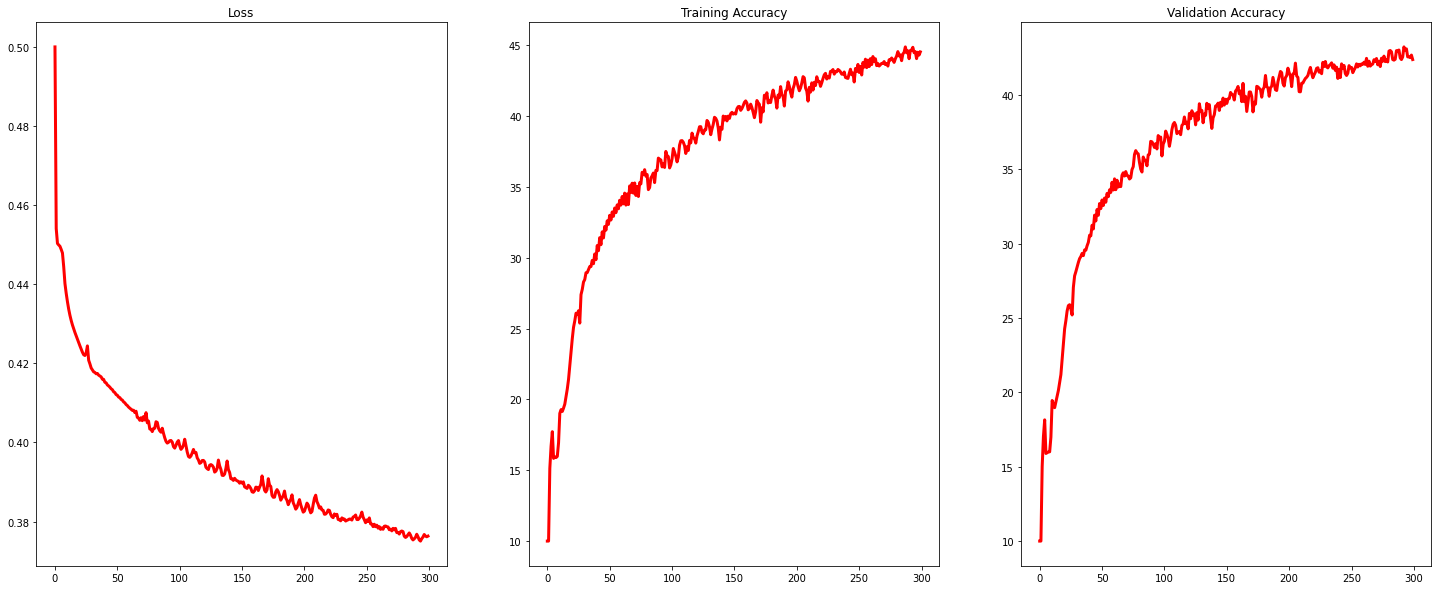

In [9]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
items = {"Loss":loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
i = 1
for key in items.keys():
    plt.subplot(1,3,i);plt.plot(items[key], color ='r', linewidth=3)
    plt.title(key)
    i+=1

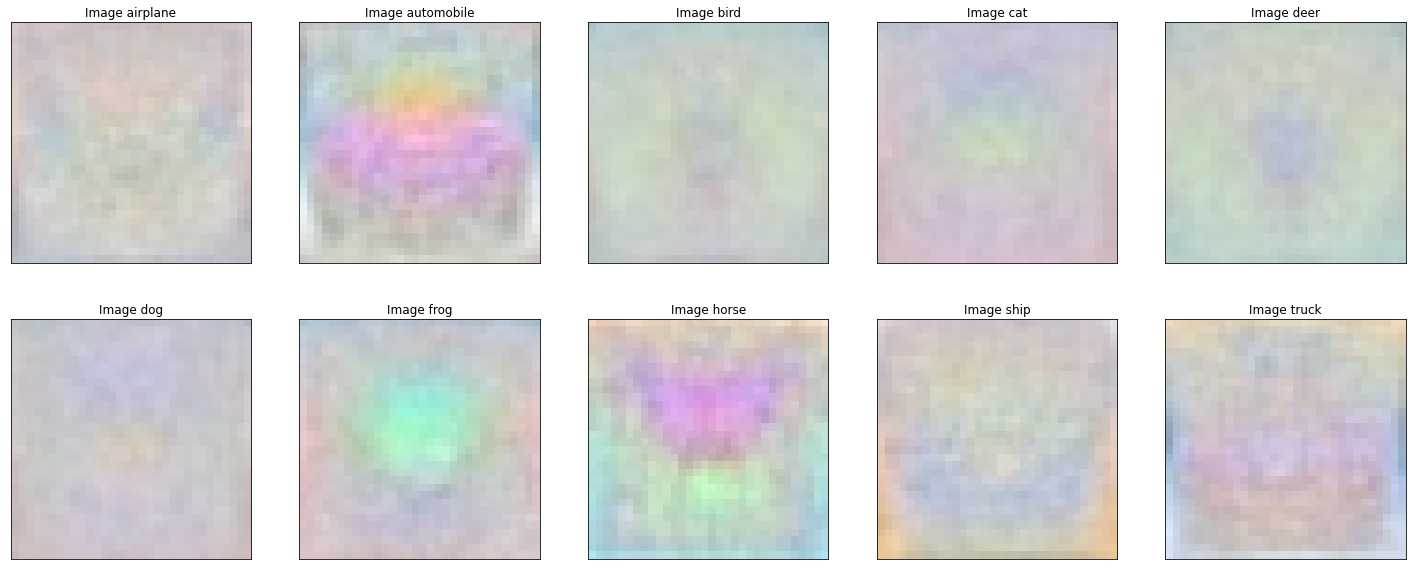

In [13]:
w = w1.dot(w2)
w =  w- np.min(w1)# Making the minimum weight zero.
images = ((w/np.max(w))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ classes[i]),
    plt.xticks([])
    plt.yticks([])      
    location+=1

plt.show()